In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from category_encoders import OrdinalEncoder
from category_encoders import OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
def titanic(filepath):
    df=pd.read_csv(filepath, index_col="PassengerId")
    #drop the columnn with NA more than half of the data
    df.drop(columns="Cabin", inplace=True)
    #drop high  cardinality
    df.drop(columns=["Name", "Ticket"], inplace=True)
    #drop multicolinarity
    df.drop(columns=["Parch"], inplace=True)
    return df

In [3]:
df=titanic("train.csv")
df.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
PassengerId,,,,,,,
1,0,3,male,22.0,1,7.2500,S
2,1,1,female,38.0,1,71.2833,C
3,1,3,female,26.0,0,7.9250,S
4,1,1,female,35.0,1,53.1000,S
5,0,3,male,35.0,0,8.0500,S


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [15]:
df.select_dtypes(object).nunique()

Name        891
Sex           2
Ticket      681
Embarked      3
dtype: int64

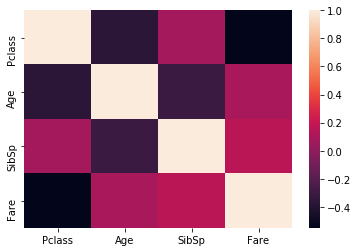

In [27]:
co=df.select_dtypes("number").drop(columns="Survived").corr()
sns.heatmap(co)

In [23]:
df["Survived"].corr(df["SibSp"])

-0.03532249888573559

In [24]:
df["Survived"].corr(df["Parch"])

0.08162940708348349

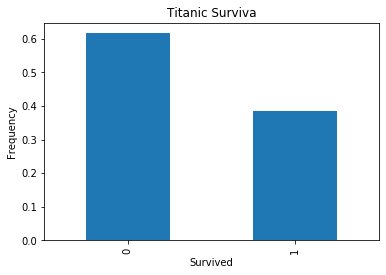

In [4]:
df["Survived"].value_counts(normalize=True).plot(
    kind="bar",
    xlabel="Survived",
    ylabel="Frequency",
    title="Titanic Surviva"
)

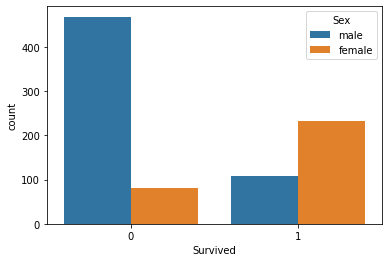

In [35]:
sns.countplot(x="Survived", hue="Sex", data=df)

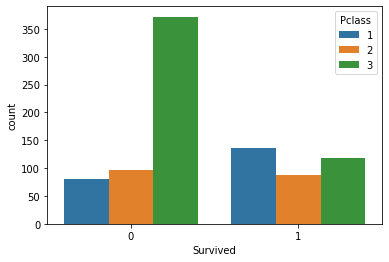

In [19]:
sns.countplot(x="Survived", hue="Pclass", data=df)

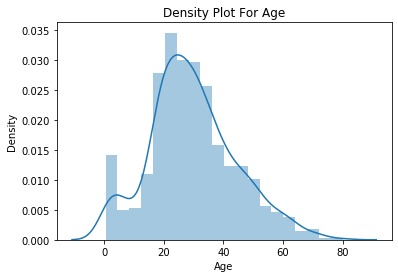

In [20]:
plt.title('Density Plot For Age')
plt.xlabel('Score')
plt.ylabel('Density')
sns.distplot(df["Age"])
plt.show()

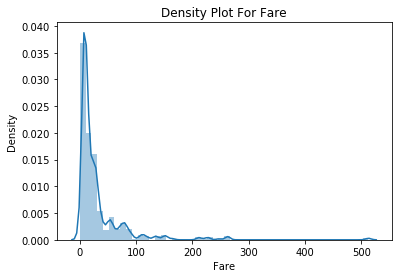

In [23]:
plt.title('Density Plot For Fare')
plt.xlabel('Fare')
plt.ylabel('Density')
sns.distplot(df["Fare"])
plt.show()

In [5]:
y_train=df["Survived"]
X_train=df.drop(columns="Survived")

In [6]:
# baseline accuracy 
base_acc=y_train.value_counts(normalize=True).max()
base_acc

0.6161616161616161

In [7]:
clf = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(strategy="median"), RandomForestClassifier(random_state=42)
)
clf

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=None, drop_invariant=False,
                               handle_missing='value', handle_unknown='value',
                               return_df=True, use_cat_names=False,
                               verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('randomforestclassifier',
                 RandomForestCla...=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=No

In [65]:
cv_scores = cross_val_score(clf, X_train, y_train, cv=5, n_jobs=-1)
print(cv_scores)

[0.79329609 0.80898876 0.8258427  0.79213483 0.82022472]


In [8]:
params = {
    "randomforestclassifier__n_estimators": range(20,100,20),
    "randomforestclassifier__max_depth": range(4,21,5)
}
params

{'randomforestclassifier__n_estimators': range(20, 100, 20),
 'randomforestclassifier__max_depth': range(4, 21, 5)}

In [9]:
model=GridSearchCV(
    clf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)
model.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   15.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('onehotencoder',
                                        OneHotEncoder(cols=None,
                                                      drop_invariant=False,
                                                      handle_missing='value',
                                                      handle_unknown='value',
                                                      return_df=True,
                                                      use_cat_names=False,
                                                      verbose=0)),
                                       ('simpleimputer',
                                        SimpleImputer(add_indicator=False,
                                                      copy=True,
                                                      fill_value=None,
                                                      missing_values=nan,
           

In [68]:
model.best_score_

0.8294457347310275

In [11]:
def titanic_test(filepath):
    X_test=pd.read_csv(filepath, index_col="PassengerId")
    #drop the columnn with NA more than half of the data
    X_test.drop(columns="Cabin", inplace=True)
    #drop high and low cardinality
    X_test.drop(columns=["Name", "Ticket"], inplace=True)
    #drop multicolinarity
    X_test.drop(columns=["Parch"], inplace=True)
    return X_test

In [12]:
X_test=titanic_test("test.csv")

In [13]:
y_test_pred=model.predict(X_test)
y_test_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [79]:
acc_training=model.score(X_train,y_train)
acc_test=model.score(X_test,y_test)
print(acc_training)
print(acc_test)

0.9248035914702581
1.0


In [14]:
output = pd.DataFrame({'PassengerId': X_test.index, 'Survived': y_test_pred})
output.to_csv('titanic_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
